In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Load the data from the 'Forma.csv' file
file_path_1 = 'csv_files\Forma.csv'
forma_data = pd.read_csv(file_path_1)

# Convert the 'Height' and 'Width' columns to numerical format
forma_data['Height'] = pd.to_numeric(forma_data['Height'].str.replace('m', '').str.replace(',', '.'), errors='coerce')
forma_data['Width'] = pd.to_numeric(forma_data['Width'].str.replace('m', '').str.replace(',', '.'), errors='coerce')

# Convert the 'RoomID' column to string format for merging
forma_data['RoomID'] = forma_data['RoomID'].astype(str)

# Load the data from the 'output.csv' file
file_path_2 = 'csv_files\output.csv'
output_data = pd.read_csv(file_path_2)

# Drop missing values in the 'Memory' and 'Attention' columns
output_data = output_data.dropna(subset=['Memory', 'Attention'])

# Convert the 'Room_ID' column to string format for merging
output_data['Room_ID'] = output_data['Room_ID'].astype(str)

# Merge the two datasets on the room IDs
merged_data = pd.merge(output_data, forma_data, left_on='Room_ID', right_on='RoomID', how='left')

# Remove rows with missing values in the 'Height' and 'Width' columns
cleaned_data = merged_data.dropna(subset=['Height', 'Width'])

# Split the data into features and target variables
X = cleaned_data[['Height', 'Width']]
y_memory = cleaned_data['Memory']
y_attention = cleaned_data['Attention']

# Split the data into training and testing sets for memory
X_train_memory, X_test_memory, y_train_memory, y_test_memory = train_test_split(
    X, y_memory, test_size=0.2, random_state=42)

# Split the data into training and testing sets for attention
X_train_attention, X_test_attention, y_train_attention, y_test_attention = train_test_split(
    X, y_attention, test_size=0.2, random_state=42)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

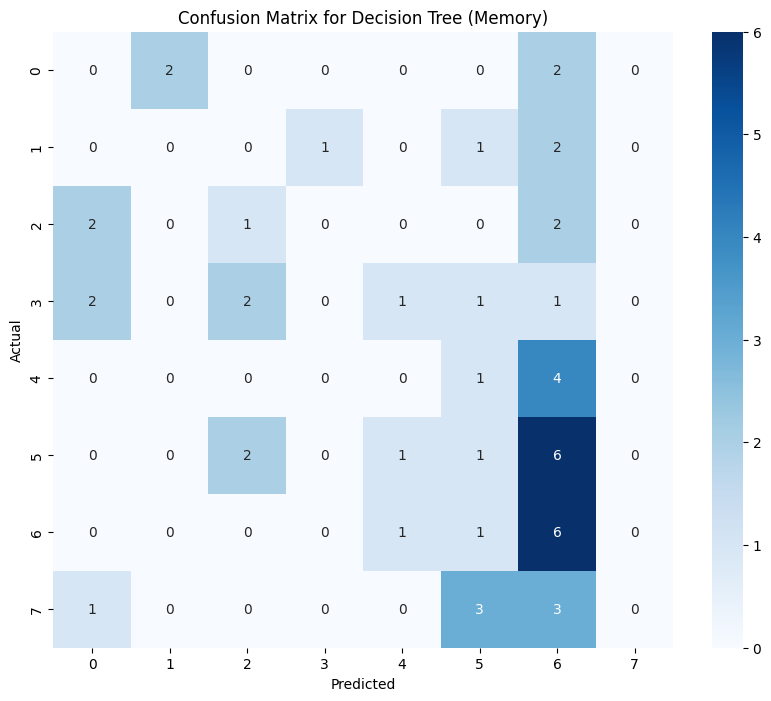

              precision    recall  f1-score   support

        -4.0       0.00      0.00      0.00         4
        -3.0       0.00      0.00      0.00         4
        -2.0       0.20      0.20      0.20         5
        -1.0       0.00      0.00      0.00         7
         0.0       0.00      0.00      0.00         5
         1.0       0.12      0.10      0.11        10
         2.0       0.23      0.75      0.35         8
         3.0       0.00      0.00      0.00         7

    accuracy                           0.16        50
   macro avg       0.07      0.13      0.08        50
weighted avg       0.08      0.16      0.10        50



In [6]:
# Train a Decision Tree classifier for memory
dt_memory = DecisionTreeClassifier(random_state=42)
dt_memory.fit(X_train_memory, y_train_memory)

# Predict the test set
y_pred_memory = dt_memory.predict(X_test_memory)

# Evaluate the model's performance
conf_matrix_memory = confusion_matrix(y_test_memory, y_pred_memory)
class_report_memory = classification_report(y_test_memory, y_pred_memory)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_memory, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree (Memory)')
plt.show()

print(class_report_memory)

c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

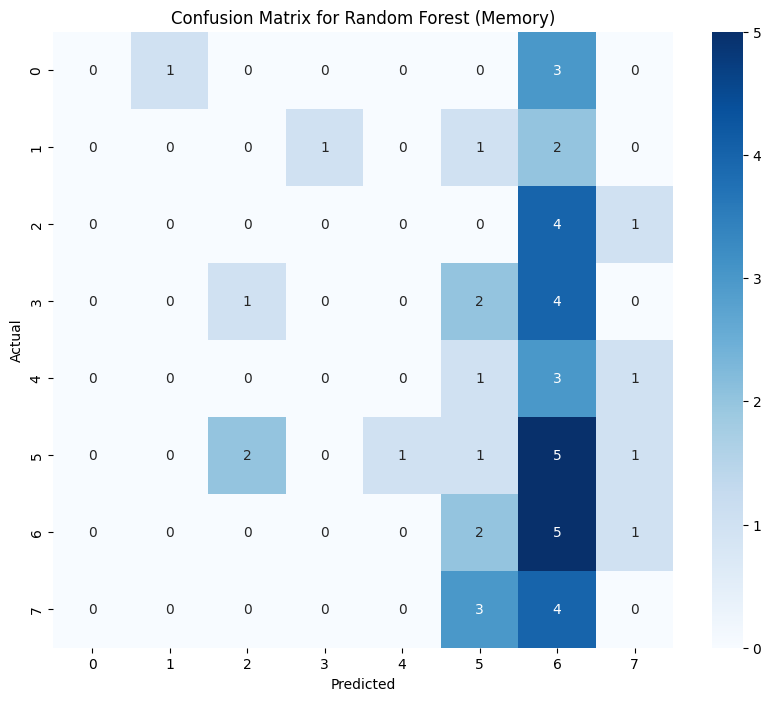

              precision    recall  f1-score   support

        -4.0       0.00      0.00      0.00         4
        -3.0       0.00      0.00      0.00         4
        -2.0       0.00      0.00      0.00         5
        -1.0       0.00      0.00      0.00         7
         0.0       0.00      0.00      0.00         5
         1.0       0.10      0.10      0.10        10
         2.0       0.17      0.62      0.26         8
         3.0       0.00      0.00      0.00         7

    accuracy                           0.12        50
   macro avg       0.03      0.09      0.05        50
weighted avg       0.05      0.12      0.06        50



In [8]:
# Train a Random Forest classifier for memory
rf_memory = RandomForestClassifier(random_state=42)
rf_memory.fit(X_train_memory, y_train_memory)

# Predict the test set
y_pred_memory_rf = rf_memory.predict(X_test_memory)

# Evaluate the model's performance
conf_matrix_memory_rf = confusion_matrix(y_test_memory, y_pred_memory_rf)
class_report_memory_rf = classification_report(y_test_memory, y_pred_memory_rf)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_memory_rf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Memory)')
plt.show()

print(class_report_memory_rf)

c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

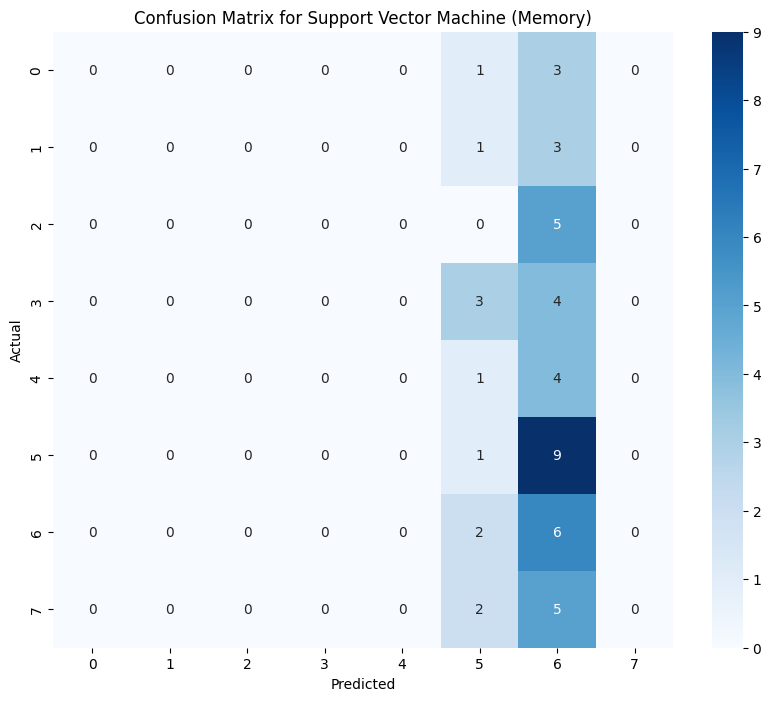

              precision    recall  f1-score   support

        -4.0       0.00      0.00      0.00         4
        -3.0       0.00      0.00      0.00         4
        -2.0       0.00      0.00      0.00         5
        -1.0       0.00      0.00      0.00         7
         0.0       0.00      0.00      0.00         5
         1.0       0.09      0.10      0.10        10
         2.0       0.15      0.75      0.26         8
         3.0       0.00      0.00      0.00         7

    accuracy                           0.14        50
   macro avg       0.03      0.11      0.04        50
weighted avg       0.04      0.14      0.06        50



In [9]:
# Train a Support Vector Machine classifier for memory
svm_memory = SVC(random_state=42)
svm_memory.fit(X_train_memory, y_train_memory)

# Predict the test set
y_pred_memory_svm = svm_memory.predict(X_test_memory)

# Evaluate the model's performance
conf_matrix_memory_svm = confusion_matrix(y_test_memory, y_pred_memory_svm)
class_report_memory_svm = classification_report(y_test_memory, y_pred_memory_svm)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_memory_svm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine (Memory)')
plt.show()

print(class_report_memory_svm)

c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

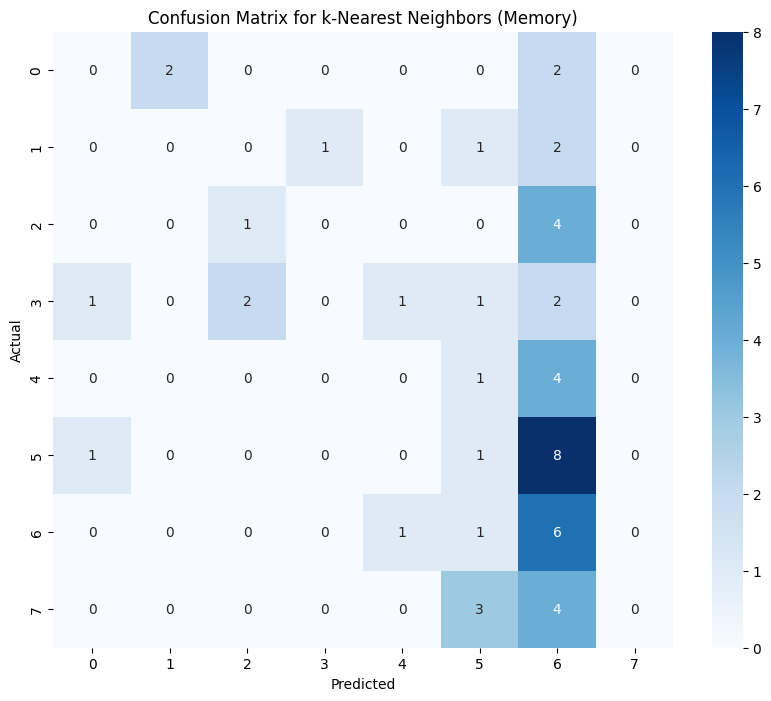

              precision    recall  f1-score   support

        -4.0       0.00      0.00      0.00         4
        -3.0       0.00      0.00      0.00         4
        -2.0       0.33      0.20      0.25         5
        -1.0       0.00      0.00      0.00         7
         0.0       0.00      0.00      0.00         5
         1.0       0.12      0.10      0.11        10
         2.0       0.19      0.75      0.30         8
         3.0       0.00      0.00      0.00         7

    accuracy                           0.16        50
   macro avg       0.08      0.13      0.08        50
weighted avg       0.09      0.16      0.10        50



In [10]:
# Train a k-Nearest Neighbors classifier for memory
knn_memory = KNeighborsClassifier()
knn_memory.fit(X_train_memory, y_train_memory)

# Predict the test set
y_pred_memory_knn = knn_memory.predict(X_test_memory)

# Evaluate the model's performance
conf_matrix_memory_knn = confusion_matrix(y_test_memory, y_pred_memory_knn)
class_report_memory_knn = classification_report(y_test_memory, y_pred_memory_knn)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_memory_knn, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-Nearest Neighbors (Memory)')
plt.show()

print(class_report_memory_knn)